
# <span style="color:rgb(213,80,0)">Example of multialignment to reference sequences </span>

Example of call to multialign2ref without optional arguments


In [1]:

% Check if there is FSDA input file
if isempty(which('X02sel.txt'))
    error('FSDA:ExAlignmentToRefSeqs:MissinInput','In order to run this file you need to install FSDA from Add-Ons menu')
end

% Check if Bioinformatics toolbox is installed
try
    % Load fastafile containing original covid and other sequences
    Seqs2align = fastaread("X02sel.txt");
catch
    disp('In order to run this file you need to install Bioinformatics toolbox')
end

% Load fasta file containing the 5 covid variants
% (Alpha, Beta, Delta, Gamma, Omicron)
variants = fastaread('Variants.txt');

% Original covid sequence and variants make up the reference sequences
refSequences=[Seqs2align(1); variants];
% Perform multialignment on the reference sequences
refSequences=multialign(refSequences);

% Remove initial covid sequence from Seqs2align
Seqs2align=[Seqs2align(2:end)];

%Call of multialgin2ref with all default arguments
Seqsaligned=multialign2ref(refSequences,Seqs2align);

Process started
   09-May-2025 12:02:48
Total estimated time (minutes)=2.4888

## Example of pre and post\-alignment of a generic sequence

In [2]:
% Choose a generic sequence
idSeq=10;

before=Seqs2align(idSeq).Sequence;
after=Seqsaligned(idSeq).Sequence;

disp('Table with reference sequences')

Table with reference sequences

In [3]:
Tref=struct2table(refSequences);
disp(Tref)

                                                                                Header                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Sequence                                                                                                                                                                                               


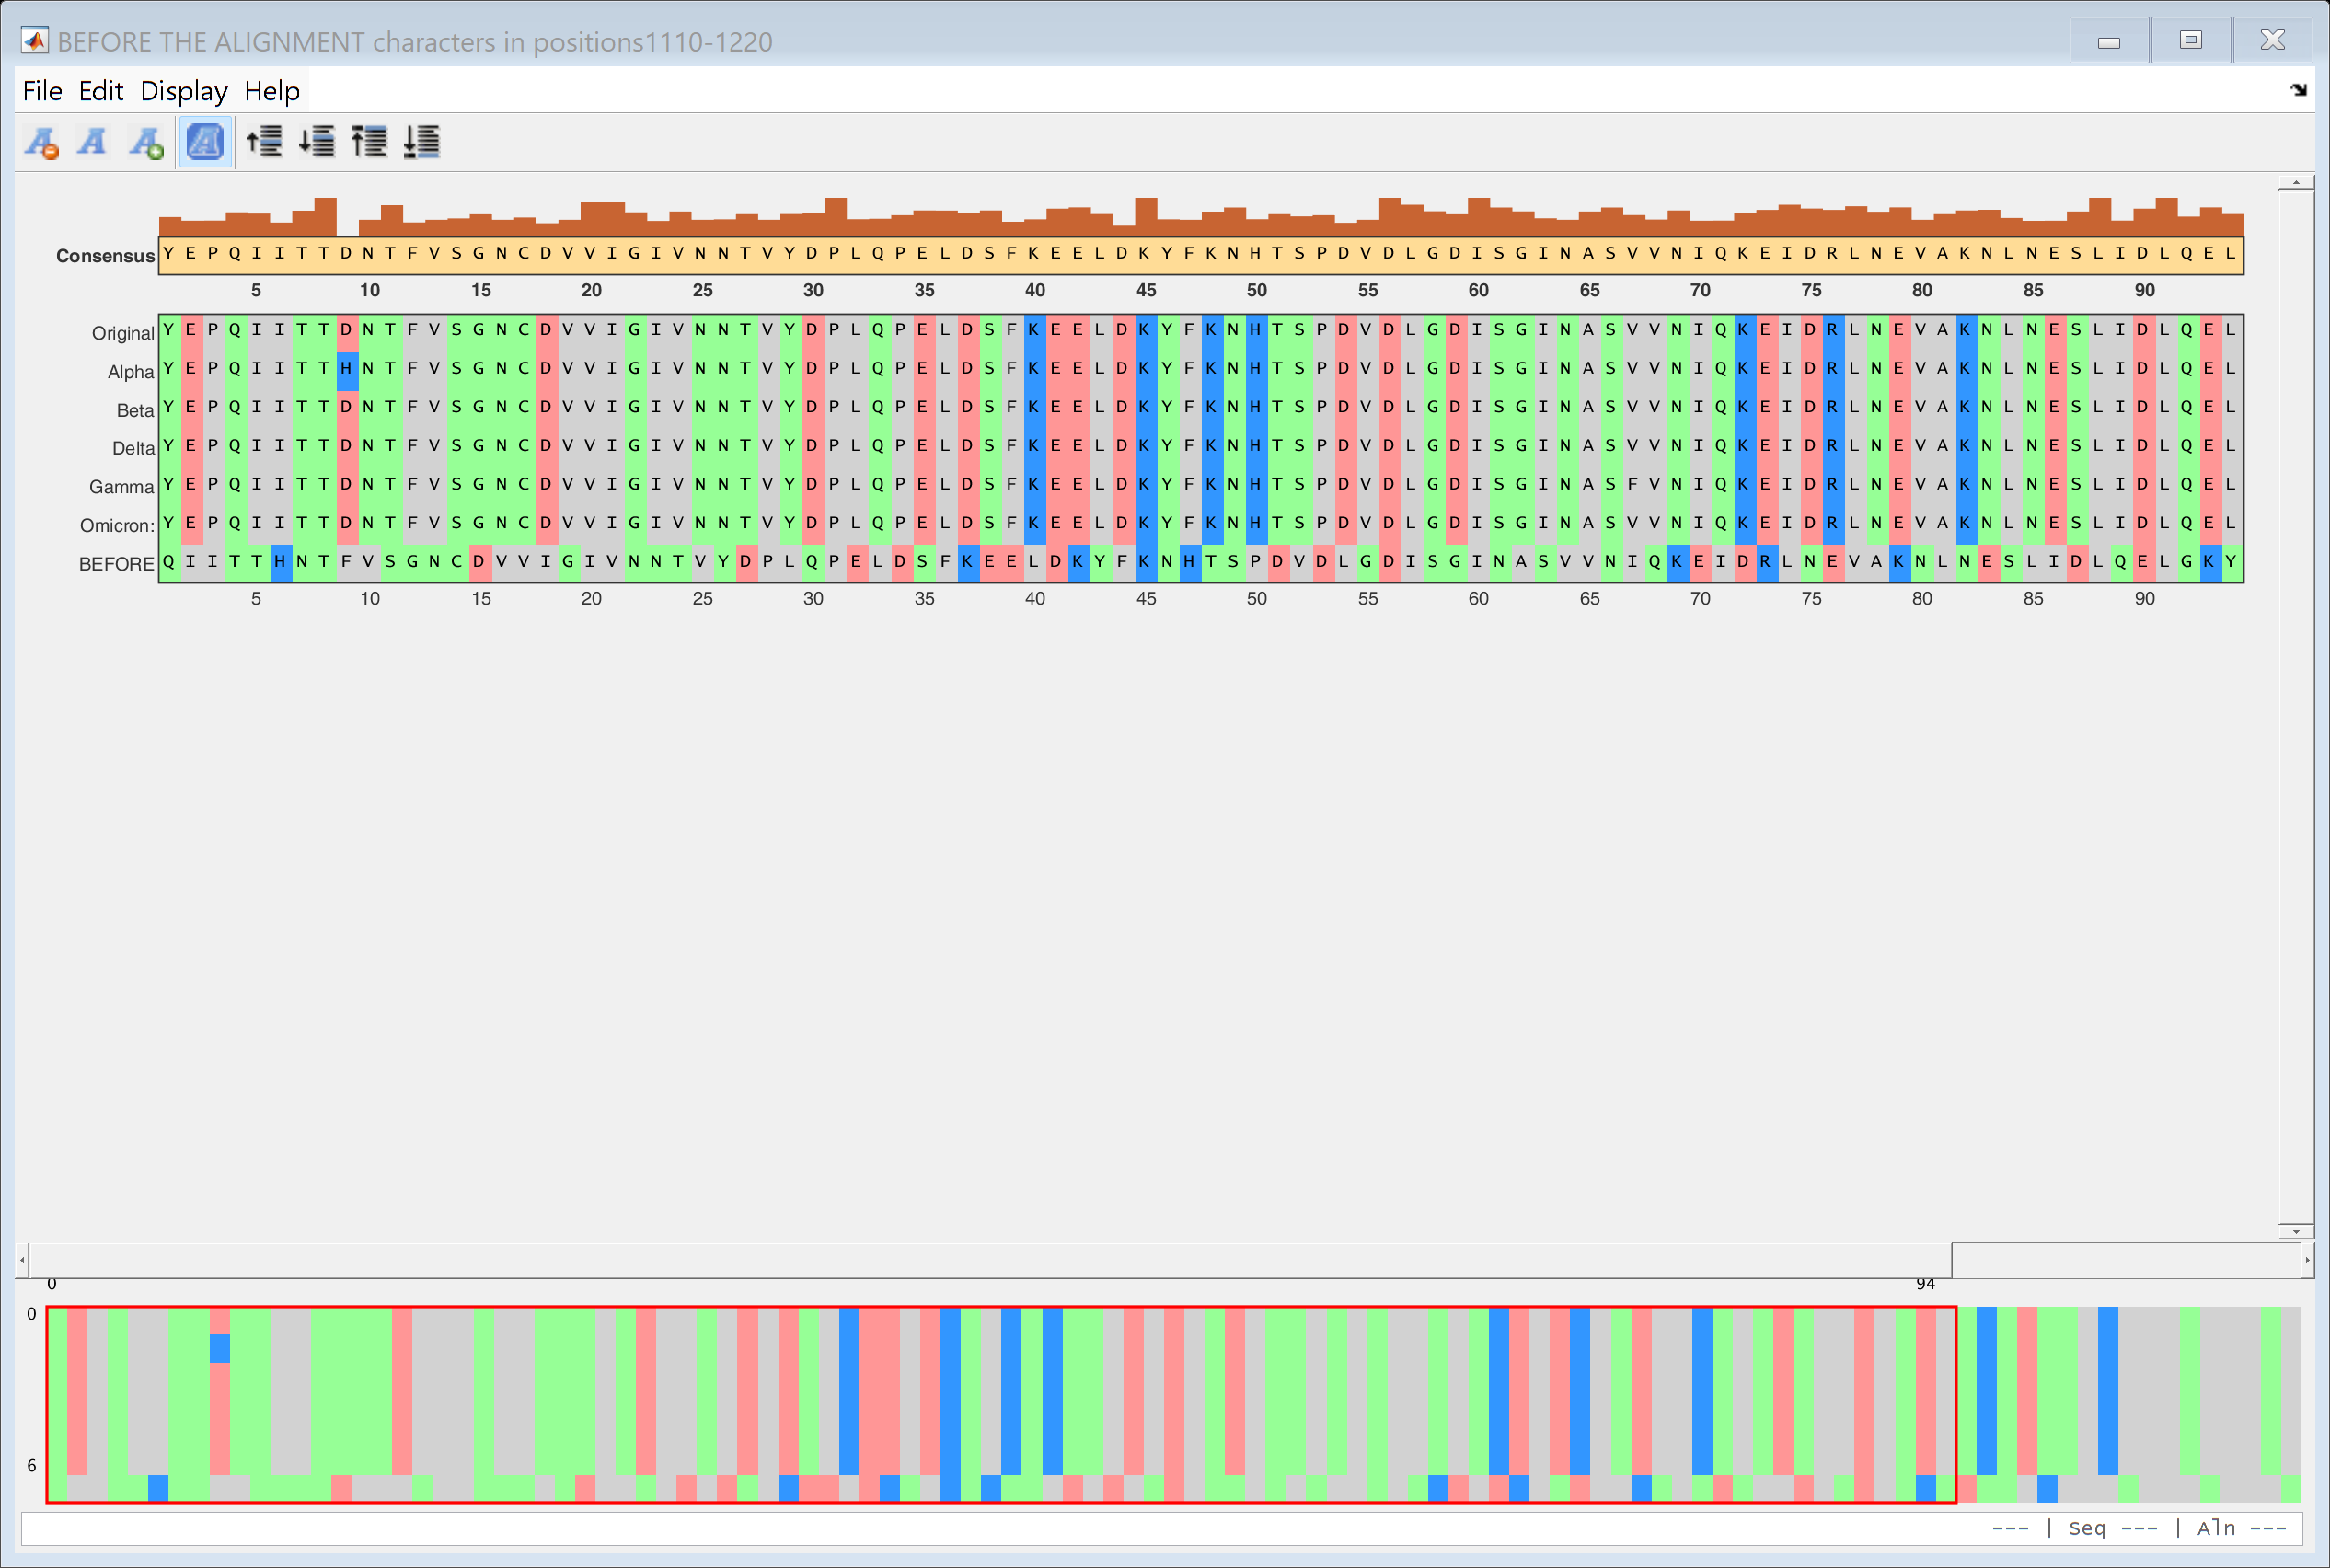

In [4]:
REF=cell2mat(Tref{:,2});
% Extract the names of the reference sequences
names=Tref{:,1};
names{1}='Original';

% Choose start and end position to analyze
a=1110;
b=1220;
stra=num2str(a); strb=num2str(b);

% Call of seqalignviewer before the alignment
REFbefore=[REF(:,a:b); before(a:b)];
seqalignviewer(REFbefore,'SeqHeaders',[names; {'BEFORE'}])

% Call of seqalignviewer before the alignment
REFafter=[REF(:,a:b); after(a:b)];
seqalignviewer(REFafter,'SeqHeaders',[names; {'AFTER'}])

% Write appropriate names in the Figures
figHandles = findall(groot, 'Type', 'figure');
figHandles(2).Name=['BEFORE THE ALIGNMENT characters in positions' stra '-' strb];


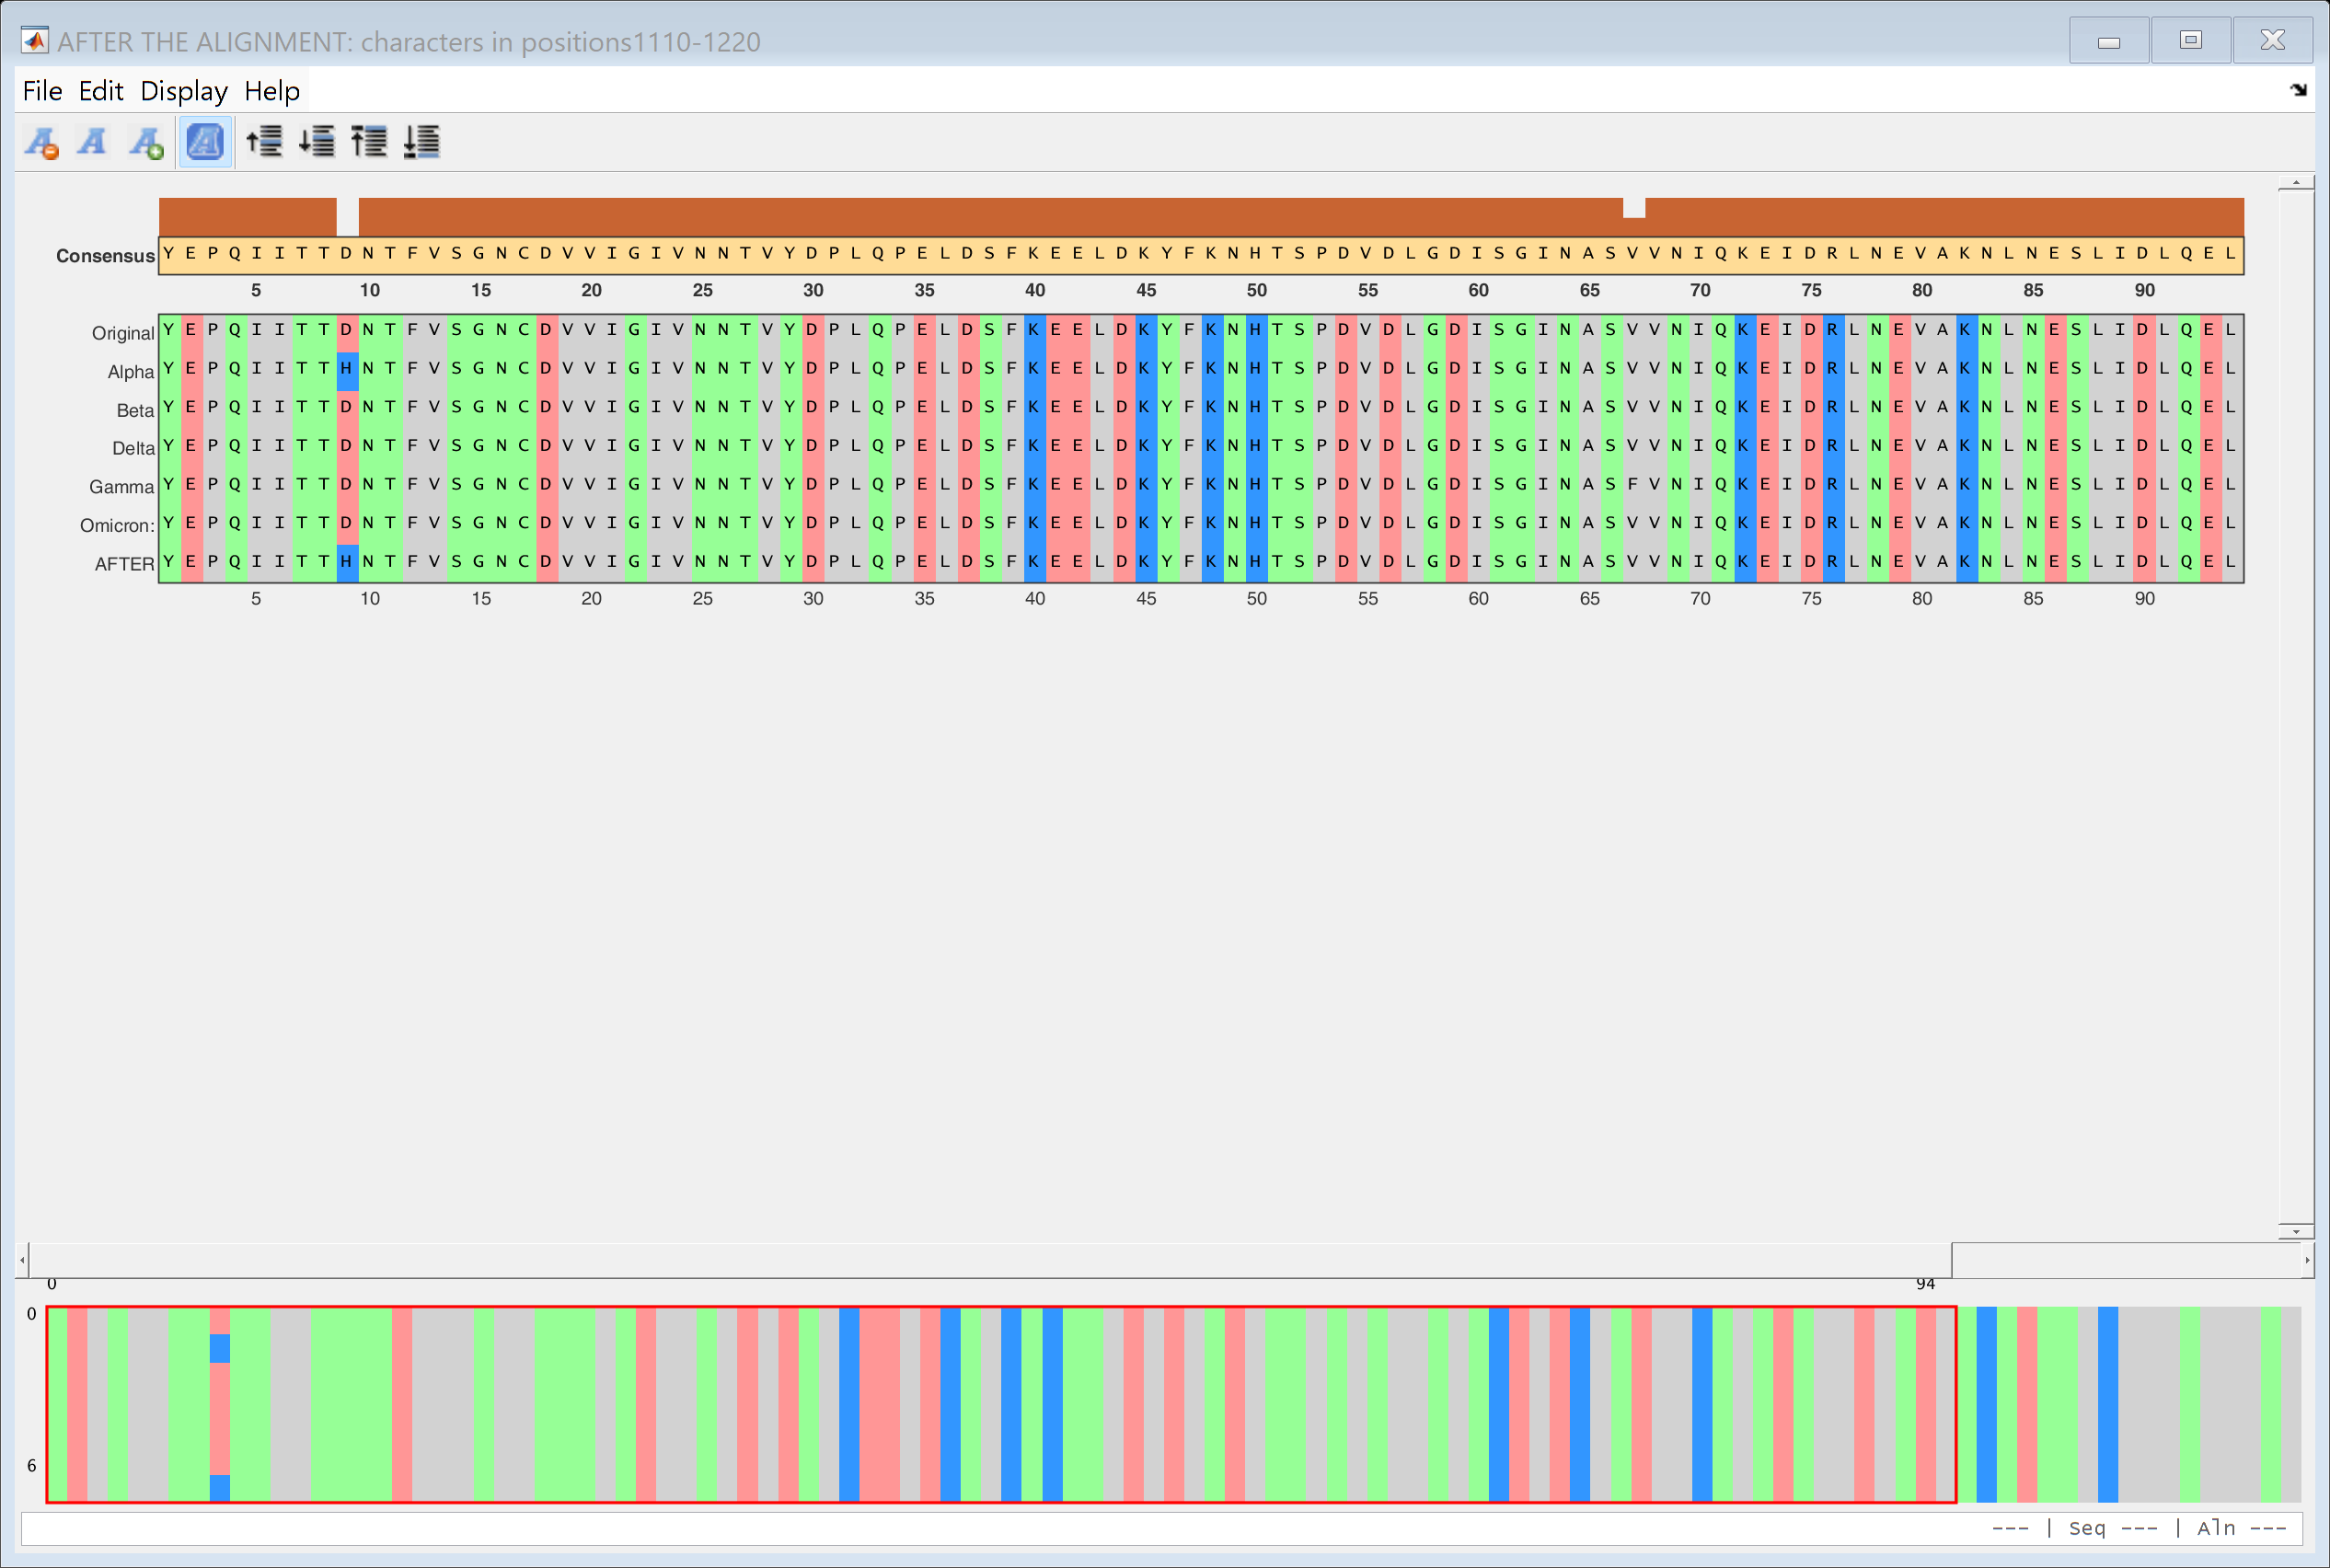

In [5]:
figHandles(1).Name=['AFTER THE ALIGNMENT: characters in positions' stra '-' strb];



!!!EndOutputRegion!!!